 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/08/ukoly/08_reseni.ipynb#Upovídanost-mužů-a-žen" data-toc-modified-id="Upovídanost-mužů-a-žen-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Upovídanost mužů a žen</a></span></li><li><span><a href="http://localhost:8888/notebooks/08/ukoly/08_reseni.ipynb#Nezaměstnanost-absolventů-vysokých-a-středních-škol" data-toc-modified-id="Nezaměstnanost-absolventů-vysokých-a-středních-škol-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nezaměstnanost absolventů vysokých a středních škol</a></span></li></ul></div>

## Upovídanost mužů a žen

Za pomoci dat uložených v souboru `talkative.csv` se pokuste dokázat, že ženy jsou upovídanější než muži. V tabulce se nachází data ze šesti experimentů, ve kterých se stanovoval počet slov vyslovený zkoumanou osobou za den. Jméno sloupce obsahuje vždy číslo experimentu a zda v něm zkoumanou osobou byl muž (M) nebo žena (F).

Další detaily k tomuto experimentu a přehledné shrnutí všech šesti experimentů najdete v následující publikaci: 
*Mehl, M. R., Vazire, S., Ramírez-Esparza, N., Slatcher, R. B., Pennebaker, J. W. (2007). Are women really more talkative than men? Science, 317(5834), 82. DOI: [10.1126/science.1139940
](dx.doi.org/10.1126/science.1139940)*.

In [1]:
df_talkative <- read.table("talkative.csv", sep = ",", header = T, quote = "\"")
head(df_talkative)
dim(df_talkative)

X1M,X1F,X2M,X2F,X3M,X3F,X4M,X4F,X5M,X5F,X6M,X6F
27531,20737,23871,16109,21143,6705,47016,11849,39207,15962,28408,15357
15684,24625,5180,10592,17791,21613,27308,25317,20868,16610,10084,13618
5638,5198,9951,24608,36571,11935,42709,40055,18857,22497,15931,9783
27997,18712,12460,13739,6724,15790,20565,18797,17271,5004,21688,26451
25433,12002,17155,22376,15430,17865,21034,20104,NA,10171,37786,12151
8077,15702,10344,9351,11552,13035,24150,17225,NA,31327,10575,8391


[1] 56 12

In [2]:
women_cols <- sapply(
    colnames(df_talkative)
    , function(x) substr(x, nchar(x), nchar(x)) == "F"
)
men_cols <- sapply(
    colnames(df_talkative)
    , function(x) substr(x, nchar(x), nchar(x)) == "M"
)

In [3]:
df_women <- df_talkative[,women_cols]
df_men <- df_talkative[,men_cols]
head(df_women)
head(df_men)

X1F,X2F,X3F,X4F,X5F,X6F
20737,16109,6705,11849,15962,15357
24625,10592,21613,25317,16610,13618
5198,24608,11935,40055,22497,9783
18712,13739,15790,18797,5004,26451
12002,22376,17865,20104,10171,12151
15702,9351,13035,17225,31327,8391


X1M,X2M,X3M,X4M,X5M,X6M
27531,23871,21143,47016,39207,28408
15684,5180,17791,27308,20868,10084
5638,9951,36571,42709,18857,15931
27997,12460,6724,20565,17271,21688
25433,17155,15430,21034,NA,37786
8077,10344,11552,24150,NA,10575


In [4]:
vectorize <- function(frame) {
    ret <- unlist(frame)
    ret[!is.na(ret)]
}

women <- vectorize(df_women)
men <- vectorize(df_men)

mean(women)
mean(men)

[1] 16215.03

[1] 15668.53

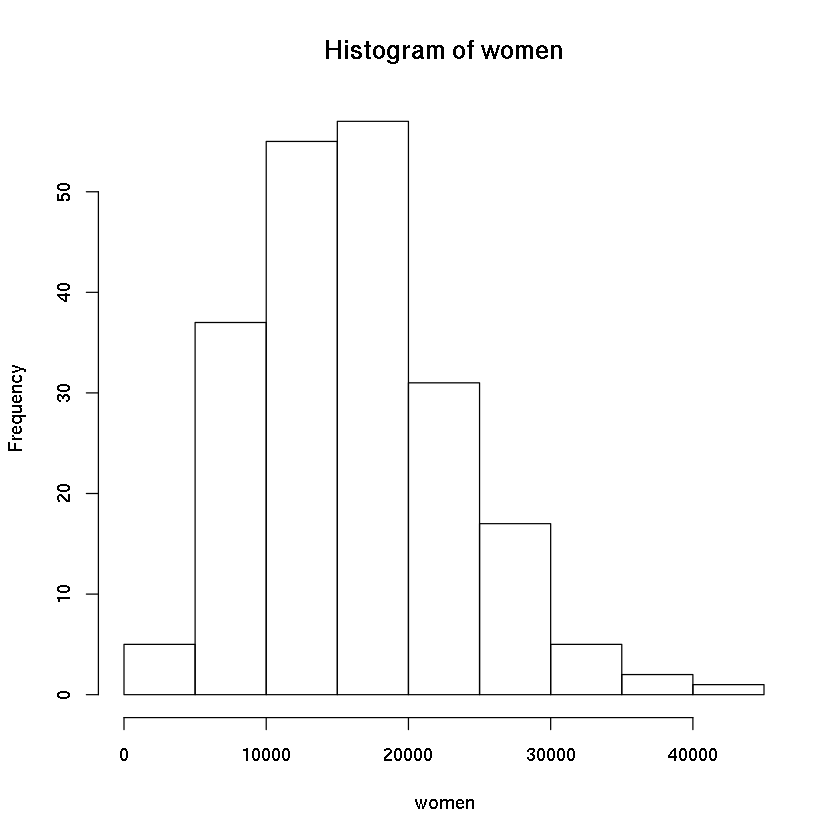

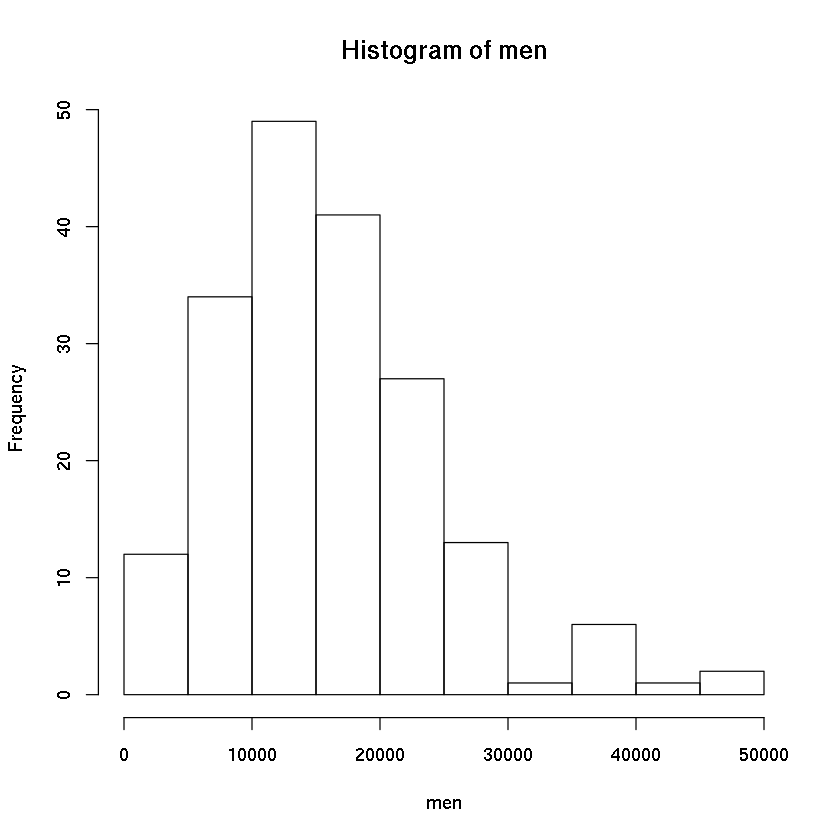

In [5]:
hist(women)
hist(men)

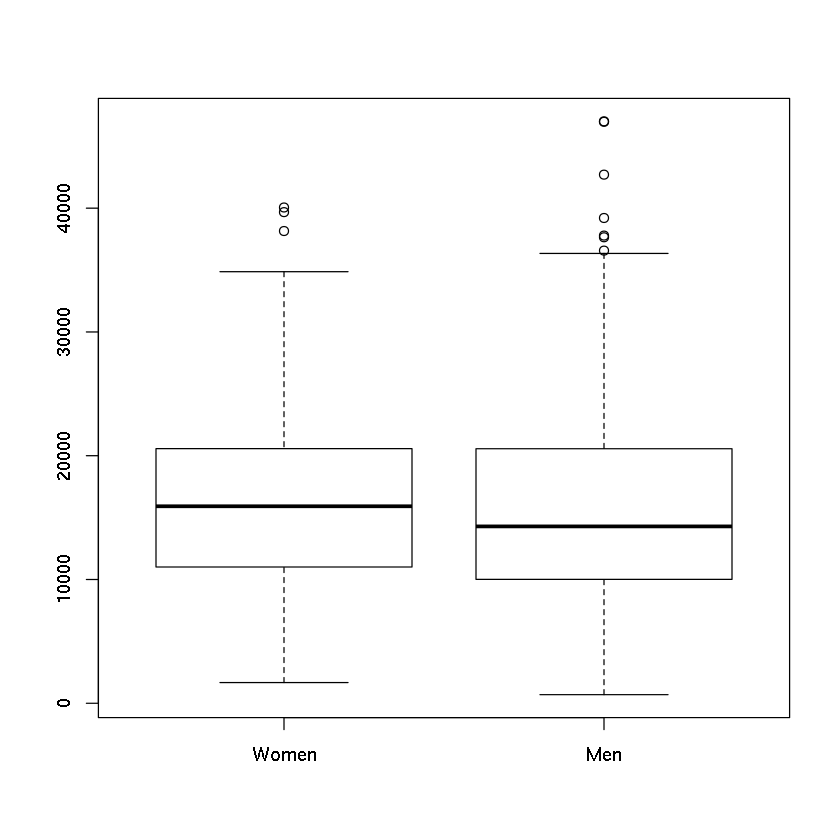

In [6]:
boxplot(women, men, names = c("Women", "Men"))

In [7]:
t.test(women, men, alternative = "greater")


	Welch Two Sample t-test

data:  women and men
t = 0.67552, df = 364.26, p-value = 0.2499
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -787.5928       Inf
sample estimates:
mean of x mean of y 
 16215.03  15668.53 


In [8]:
women <- women[women < 35000]
men <- men[men < 35000]

t.test(women, men, alternative = "greater")


	Welch Two Sample t-test

data:  women and men
t = 2.0832, df = 373.34, p-value = 0.01896
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 301.3601      Inf
sample estimates:
mean of x mean of y 
 15880.51  14434.71 


## Nezaměstnanost absolventů vysokých a středních škol

V souboru `employment.csv` jsou data o nezaměstnanosti absolventů středních a vysokých škol v USA ve dvanáctiletém období. Zjistěte, zda se nezaměstnanost u těchto dvou skupin významně liší.

In [9]:
df_employment <- read.table("employment.csv", sep = ",", header = T, quote = "\"")
head(df_employment)
dim(df_employment)

College,HiSchool
2.8,5.9
2.2,4.9
2.2,4.8
1.7,5.4
2.3,6.3
2.3,6.9


[1] 12  2

In [10]:
t.test(df_employment$College, df_employment$HiSchool, paired = T)


	Paired t-test

data:  df_employment$College and df_employment$HiSchool
t = -12.366, df = 11, p-value = 8.536e-08
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.839552 -3.377114
sample estimates:
mean of the differences 
              -4.108333 
